# Alignment Visualization

We provide functions to visualize the gold alignments and predicted alignments.

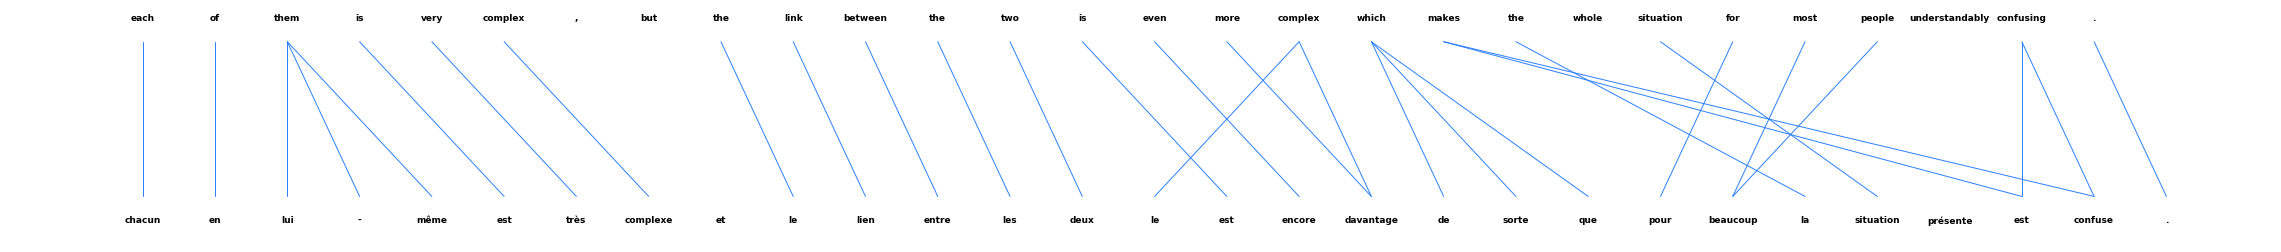

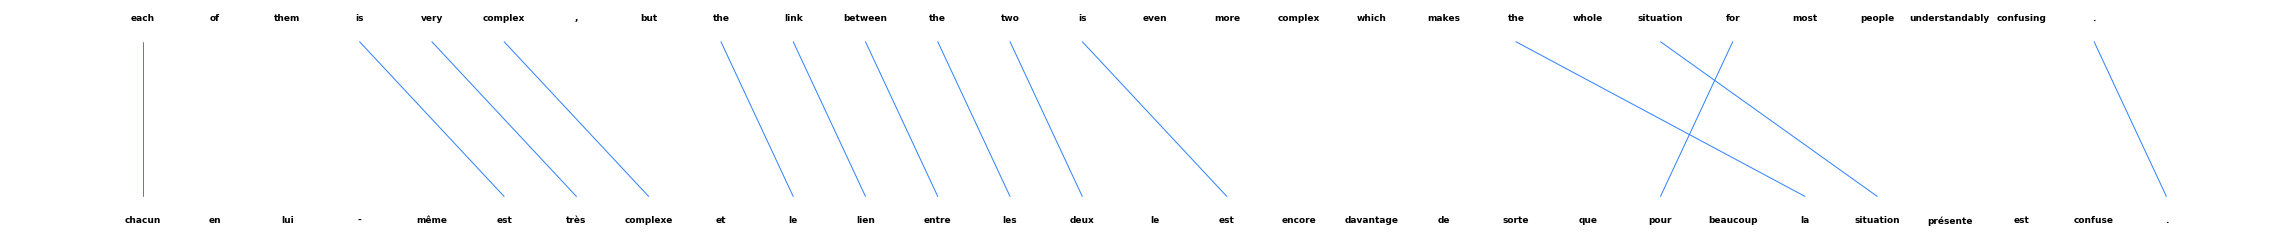

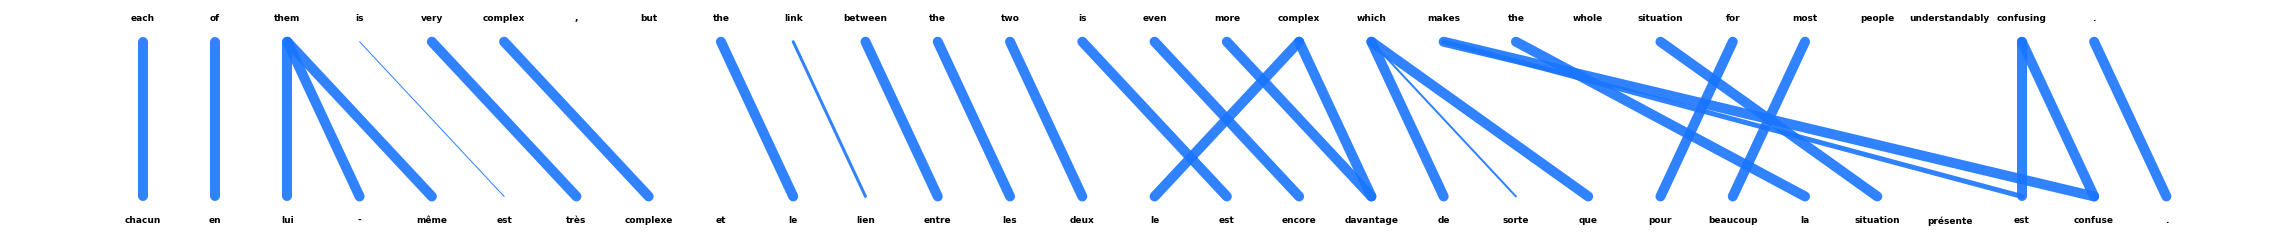

In [3]:
import matplotlib.pyplot as plt
from itertools import accumulate
from collections import defaultdict
import numpy as np

def plot_words(axes, xs, ys, words, vertical_position, weight='bold', color='black'):
    """
    
    Plots a pair of sentences at given positions, on a given axes object.

    Args:
       axes (pyplotlib axes object): axes on which to plot
       xs (list of floats): x coordinates
       ys (list of floats): y coordinates
       words (list of strings): words to be displayed
       vertical_position (string): where words should be displayed relative to point coordinates
       weight (string): font weight
       color (string or list of strings): color/s to be used for displaying words
    """
    for n in range(0, len(words)):
        axes.text(xs[n], ys[n], words[n], size=9, family='sans-serif',
                  weight=weight, color=color,
                  horizontalalignment='center',
                  verticalalignment=vertical_position)


def get_coordinates(bitext, draw_all=False, one_sent=False, sent_index=0, word_index=0):
    """
   

    Generates x and y coordinates to be used for plotting sentence pairs
    and alignment links.

    Args:
       bitext (list of tuples): list of translation pairs
       one_sent (Boolean): whether coordinates ahould be generated for one
           selected sentence pair and one word in it, or for the whole bitext
       sent_index (int): index of the selected sentence pair
       word_index (int): index of the target foreign word
    """
    x_positions_f = []
    y_positions_f = []
    x_positions_e = []
    y_positions_e = []
    edge_pos = []
    words_f = []
    words_e = []
    sents, alignments = bitext
    for (n, (f, e)) in enumerate(sents):

        for j in range(0, len(f)):
            x_positions_f.append(j+1)
            y_positions_f.append((3*n)-2)
            words_f.append(f[j])
            if (not one_sent) or (one_sent and word_index==j):
                for i in range(0, len(e)):
                    if draw_all:
                        edge_pos.append([[j+1, i+1], [(3*n)-1.9, (3*n)-1.1]])
                    else:
                        if i in alignments[j]:
                            edge_pos.append([[j+1, i+1], [(3*n)-1.9, (3*n)-1.1]])

        for i in range(0, len(e)):
            x_positions_e.append(i+1)
            y_positions_e.append((3*n)-1)
            words_e.append(e[i])
    coord_dict = {'x_f': x_positions_f, 'x_e': x_positions_e,
            'y_f': y_positions_f, 'y_e': y_positions_e,
            'edges': edge_pos, 'w_f': words_f, 'w_e': words_e}
    return coord_dict

def draw_alignment(naacl_path, french_path, english_path, fig_path, sure=False, sentence=1):
    """
    input:
        naacl_path, file with gold alignments
        french_path, french sentences
        english_path, enlgish sentences
        fig_path, output figure path
        sure, print sure alignments
        sentence, position id of sentence to print form the corpus

    """
    i = 1
    f = open(french_path, 'r')
    while i <= sentence:
        french = f.readline().split()
        i += 1
    f.close()

    i = 1
    e = open(english_path, 'r')
    while i <= sentence:
        english = e.readline().split()
        i += 1
    e.close()
    
    n = open(naacl_path, 'r')
    alignments = defaultdict(list)
    line = n.readline().split()
   
    while line[0] != str(sentence):
        line = n.readline().split()
        
    while line[0] != str(sentence+1):
        if sure:
            if line[-1] != 'P':
                alignments[int(line[2])-1].append(int(line[1])-1)
        else:
            alignments[int(line[2])-1].append(int(line[1])-1)
        line = n.readline().split()

    bitext = ([(french, english)], alignments)

    fig = plt.figure(figsize=(40, 4))
    ax = plt.axes()
    plt.axis('off')
    coordinates = get_coordinates(bitext)


    lines = [ax.plot(xy[0], xy[1],alpha=0.9,linestyle='-',color='#1a75ff',linewidth=1.0, solid_capstyle='round')[0] for xy in coordinates['edges']]

    ax.scatter(coordinates['x_f']+coordinates['x_e'], coordinates['y_f']+coordinates['y_e'],
                    s=30, c='white', marker='o', lw=0, alpha=1)

    plot_words(ax, coordinates['x_f'], coordinates['y_f'], coordinates['w_f'], 'top')
    plot_words(ax, coordinates['x_e'], coordinates['y_e'], coordinates['w_e'], 'bottom')

    plt.savefig(fig_path + '.pdf')
    
    
def draw_weighted_alignment(pred_path, naacl_path, french_path, english_path, fig_path, sure=False, sentence=1):
    """
    Draws an alignment that is weighted according to probs of alignment.
    We use the last column (4th) for the probability of alignment.
    """
    i = 1
    f = open(french_path, 'r')
    while i <= sentence:
        french = f.readline().split()
        i += 1
    f.close()

    i = 1
    e = open(english_path, 'r')
    while i <= sentence:
        english = e.readline().split()
        i += 1
    e.close()

    n = open(naacl_path, 'r')
    alignments = defaultdict(list)
    line = n.readline().split()
    while line[0] != str(sentence):
        line = n.readline().split()
    while line[0] != str(sentence+1):
        if sure:
            if line[-1] != 'P':
                alignments[int(line[2])-1].append(int(line[1])-1)
        else:
            alignments[int(line[2])-1].append(int(line[1])-1)
        line = n.readline().split()

    bitext = ([(french, english)], alignments)

    fig = plt.figure(figsize=(40, 4))
    ax = plt.axes()
    plt.axis('off')
    coordinates = get_coordinates(bitext)

    # get weights of the edges:
    
    
    n_pred = open(pred_path, 'r')
    raw_line_pred = []
    alignments_pred = defaultdict(list)
    line_pred = n_pred.readline().split()
    
    while line_pred[0] != str(sentence):
        line_pred = n_pred.readline().split()
        
    while line_pred[0] != str(sentence+1):
        
        alignments_pred[int(line_pred[2])-1].append(int(line_pred[1])-1)
        raw_line_pred.append(float(line_pred[-1]))
        line_pred = n_pred.readline().split()

    bitext_pred = ([(french, english)], alignments_pred)
    

    line_weights = [w*10 for w in raw_line_pred]
    edge_coords = coordinates['edges']
    lines = [ax.plot(xy[0], xy[1], alpha=0.9, linewidth=w, linestyle='-', color='#1a75ff', solid_capstyle='round')[0] for xy,w in zip(coordinates['edges'], line_weights)]


    ax.scatter(coordinates['x_f']+coordinates['x_e'], coordinates['y_f']+coordinates['y_e'],
                    s=30, c='white', marker='o', lw=0, alpha=1)

    plot_words(ax, coordinates['x_f'], coordinates['y_f'], coordinates['w_f'], 'top')
    plot_words(ax, coordinates['x_e'], coordinates['y_e'], coordinates['w_e'], 'bottom')

    plt.savefig(fig_path)
    #plt.clf()

# format gold alignment data
# sentence_no position_L1 position_L2 [S|P]
naacl_path = 'dev.wa.nonullalign' 
# predicted alignments
# sentence_no position_L1 position_L2 prob_alignment
pred_path = 'pred.wa'
# French sentences
french_path = 'dev.f'
# English sentences
english_path = 'dev.e'

# path to save figure
fig_path = '/Users/mrios/workspace/nlp2/resources/notebooks/fig'

# draws gold Probable alignments 
draw_alignment(naacl_path, french_path, english_path, fig_path, sure=False)
# draws gold Sure alignments
draw_alignment(naacl_path, french_path, english_path, fig_path, sure=True)
# draws predicted alingments                          
draw_weighted_alignment(pred_path, naacl_path, french_path, english_path, fig_path, sure=False)